File to explore the .csv file that contains all the parameters about the
failures and how they relate to rainfal values.
The aim is to check what are the points the immediately fail given any amount 
of rainfall at the start of the timeseries.

Marina Ruiz Sanchez-Oro
16/11/2021

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
precip_file = "/exports/csce/datastore/geos/groups/LSDTopoData/FORESEE/Data/Calibration/2014-01-01_to_2019-12-31_Intensity.csv"
precip = pd.read_csv(precip_file)

In [10]:
high_prec = precip[:167]

In [ ]:
high_prec.idxmax()

In [9]:
precip[160:170]

,duration_s,intensity_mm_sec
160,86400,0.000037
161,86400,0.000030
162,86400,0.000015
163,86400,0.000067
164,86400,0.000186
165,86400,0.000045
166,86400,0.000243
167,86400,0.000003
168,86400,0.000059
169,86400,0.000083


In [3]:
failures_file = "/exports/csce/datastore/geos/groups/LSDTopoData/FORESEE/Data/Calibration/Validated_updated_FoS_depth.csv"
failures = pd.read_csv(failures_file)

In [7]:
from scipy import stats
cormat = failures.corr()

In [8]:
round(cormat,2)

,alpha,D_0,K_sat,d,Iz_over_K_steady,friction_angle,cohesion,weight_of_water,weight_of_soil,time_of_failure,factor_of_safety,min_depth,S,Z,row,col,observed_failtime,time_difference
alpha,1.00,0.00,0.14,0.0,-0.00,0.14,-0.03,0.27,-0.11,0.12,0.28,0.25,1.00,0.15,-0.17,-0.07,-0.07,0.12
D_0,0.00,1.00,0.63,-0.0,-0.03,-0.12,0.03,-0.21,-0.08,-0.44,-0.21,-0.14,0.00,-0.19,-0.26,-0.22,-0.06,-0.23
K_sat,0.14,0.63,1.00,-0.0,0.17,0.11,-0.09,-0.28,-0.07,-0.18,-0.10,-0.11,0.14,-0.09,-0.13,-0.16,-0.05,-0.08
d,0.00,-0.00,-0.00,1.0,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00
Iz_over_K_steady,-0.00,-0.03,0.17,0.0,1.00,0.32,0.73,-0.11,0.53,0.22,-0.01,-0.12,-0.00,-0.06,0.16,-0.11,-0.07,0.19
friction_angle,0.14,-0.12,0.11,-0.0,0.32,1.00,0.49,0.07,0.24,0.04,-0.05,-0.22,0.14,0.11,0.08,0.04,-0.07,0.07
cohesion,-0.03,0.03,-0.09,0.0,0.73,0.49,1.00,0.03,0.60,0.21,-0.01,-0.09,-0.03,0.03,0.16,-0.03,-0.10,0.20
weight_of_water,0.27,-0.21,-0.28,0.0,-0.11,0.07,0.03,1.00,-0.06,0.21,0.11,0.06,0.27,0.12,0.04,0.18,0.06,0.08
weight_of_soil,-0.11,-0.08,-0.07,0.0,0.53,0.24,0.60,-0.06,1.00,0.06,0.05,0.15,-0.11,0.08,0.13,0.08,-0.04,0.07
time_of_failure,0.12,-0.44,-0.18,-0.0,0.22,0.04,0.21,0.21,0.06,1.00,0.20,0.03,0.12,0.14,0.41,-0.10,-0.09,0.69


<AxesSubplot:>

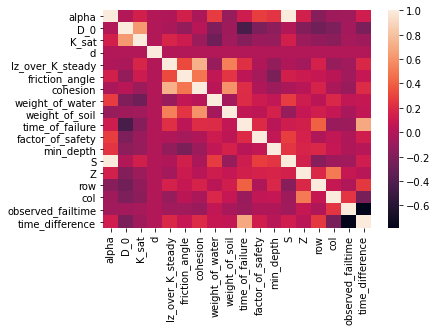

In [9]:
sns.heatmap(cormat)

In [5]:
failures.head(100)

,alpha,D_0,K_sat,d,Iz_over_K_steady,friction_angle,cohesion,weight_of_water,weight_of_soil,time_of_failure,factor_of_safety,min_depth,S,Z,row,col,observed_failtime
0,0.050537,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.557541,0.1,0.050537,652.631226,4.0,690.0,16588800.0
1,0.058243,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.467392,0.1,0.058243,655.851807,5.0,687.0,87091200.0
2,0.034425,0.000015,8.699790e-08,3.236842,0.136849,0.291813,17356.145740,9800.000000,18178.947821,75254400.0,-2.775330,0.1,0.034425,684.327332,14.0,770.0,91756800.0
3,0.079407,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.295952,0.1,0.079407,711.506897,15.0,804.0,27993600.0
4,0.044569,0.000015,8.699790e-08,3.236842,0.136849,0.291813,17356.145740,9800.000000,18178.947821,75254400.0,-2.111099,0.1,0.044569,687.526672,17.0,773.0,112492800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.105236,0.000001,1.261779e-08,3.236842,0.307966,0.291754,4687.273062,9800.506103,16502.746654,73785600.0,0.431980,0.1,0.105236,569.075806,64.0,460.0,34214400.0
96,0.127192,0.000005,4.547243e-08,3.236842,0.072224,0.458837,13925.813084,9800.370626,18535.187001,57024000.0,-0.923588,0.1,0.127192,754.794678,64.0,937.0,16588800.0
97,0.196055,0.000028,8.343873e-08,3.236842,0.457695,0.237341,19026.865701,9800.000000,16390.948022,34300800.0,0.192238,0.1,0.196055,770.461182,64.0,955.0,66873600.0
98,0.107124,0.000001,1.261779e-08,3.236842,0.307966,0.291754,4687.273062,9800.506103,16502.746654,73785600.0,0.415123,0.1,0.107124,638.328552,65.0,376.0,67392000.0


In [9]:
#failures = failures.sort_values(by='time_of_failure', ascending=True)

<AxesSubplot:xlabel='time_of_failure', ylabel='K_sat'>

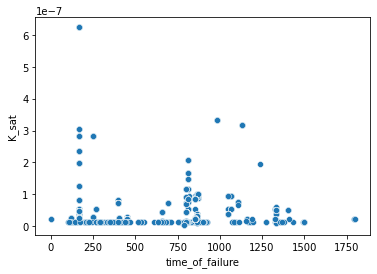

In [33]:
sns.scatterplot( failures['time_of_failure']/86400,failures['K_sat'])

<AxesSubplot:xlabel='time_of_failure', ylabel='D_0'>

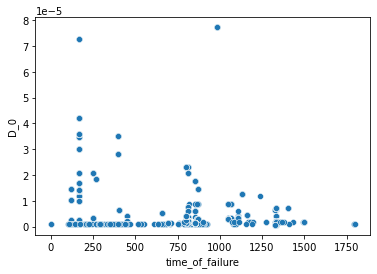

In [34]:
sns.scatterplot( failures['time_of_failure']/86400,failures['D_0'])

In [5]:
# difference in predicted time from the observed failure time
failure_difference = failures['time_of_failure']-failures['observed_failtime']

In [6]:
# Negative : observed failtime is *before* predicted failtime 
# Positive : observed failtime is *after* predicted failtime
failures['time_difference'] = failure_difference

In [37]:
failures.head()

,alpha,D_0,K_sat,d,Iz_over_K_steady,friction_angle,cohesion,weight_of_water,weight_of_soil,time_of_failure,factor_of_safety,min_depth,S,Z,row,col,observed_failtime,time_difference
0,0.050537,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.557541,0.1,0.050537,652.631226,4.0,690.0,16588800.0,83635200.0
1,0.058243,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.467392,0.1,0.058243,655.851807,5.0,687.0,87091200.0,13132800.0
2,0.034425,0.000015,8.699790e-08,3.236842,0.136849,0.291813,17356.145740,9800.000000,18178.947821,75254400.0,-2.775330,0.1,0.034425,684.327332,14.0,770.0,91756800.0,-16502400.0
3,0.079407,0.000005,2.210798e-08,3.236842,0.241674,0.200190,12116.307194,9800.851942,16740.399761,100224000.0,-0.295952,0.1,0.079407,711.506897,15.0,804.0,27993600.0,72230400.0
4,0.044569,0.000015,8.699790e-08,3.236842,0.136849,0.291813,17356.145740,9800.000000,18178.947821,75254400.0,-2.111099,0.1,0.044569,687.526672,17.0,773.0,112492800.0,-37238400.0


<AxesSubplot:xlabel='time_difference', ylabel='Count'>

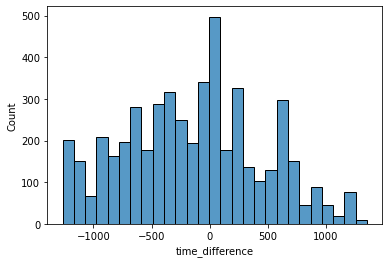

In [47]:
sns.histplot(failures['time_difference']/86400)

<AxesSubplot:xlabel='time_difference', ylabel='K_sat'>

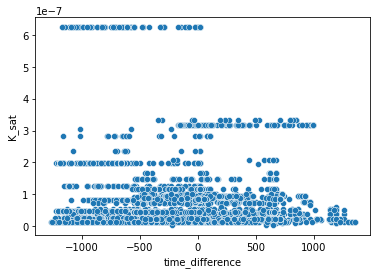

In [39]:
sns.scatterplot(failures['time_difference']/86400, failures['K_sat'])

<AxesSubplot:xlabel='time_difference', ylabel='D_0'>

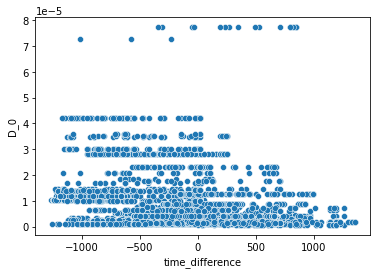

In [40]:
sns.scatterplot(failures['time_difference']/86400, failures['D_0'])

<AxesSubplot:xlabel='time_difference', ylabel='friction_angle'>

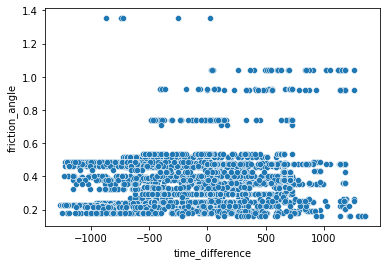

In [49]:
sns.scatterplot(failures['time_difference']/86400, failures['friction_angle'])

<AxesSubplot:xlabel='time_difference', ylabel='min_depth'>

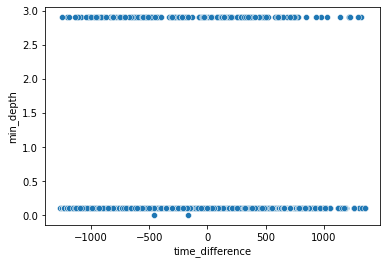

In [51]:
sns.scatterplot(failures['time_difference']/86400, failures['min_depth'])

<AxesSubplot:xlabel='time_difference', ylabel='intensity_mm_sec'>

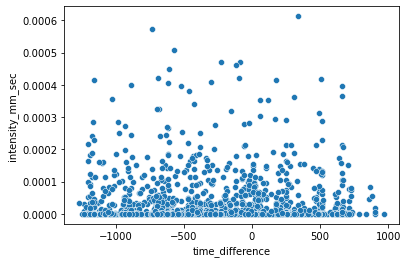

In [48]:
sns.scatterplot(failures['time_difference']/86400, precip['intensity_mm_sec'])

In [ ]:
# select the cases where the hydraulic conductivity leads to the point failing very early on